**元データを処理してシミュレーションに渡すデータを作る**


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import glob
import os
import re


os.makedirs('output/insight', exist_ok=True)


def numerical_sort(value):
    numbers = re.findall(r'\d+', value)
    return list(map(int, numbers))

# Reward

In [18]:
reward_file_paths = glob.glob('output/*/reward.csv')
reward_sorted_file_paths = sorted(reward_file_paths, key=numerical_sort)

print(reward_sorted_file_paths)

['output\\episode0\\reward.csv', 'output\\episode1\\reward.csv', 'output\\episode2\\reward.csv', 'output\\episode3\\reward.csv', 'output\\episode4\\reward.csv', 'output\\episode5\\reward.csv', 'output\\episode6\\reward.csv', 'output\\episode7\\reward.csv', 'output\\episode8\\reward.csv', 'output\\episode9\\reward.csv', 'output\\episode10\\reward.csv', 'output\\episode11\\reward.csv', 'output\\episode12\\reward.csv', 'output\\episode13\\reward.csv', 'output\\episode14\\reward.csv', 'output\\episode15\\reward.csv', 'output\\episode16\\reward.csv', 'output\\episode17\\reward.csv', 'output\\episode18\\reward.csv', 'output\\episode19\\reward.csv', 'output\\episode20\\reward.csv', 'output\\episode21\\reward.csv', 'output\\episode22\\reward.csv', 'output\\episode23\\reward.csv', 'output\\episode24\\reward.csv', 'output\\episode25\\reward.csv', 'output\\episode26\\reward.csv', 'output\\episode27\\reward.csv', 'output\\episode28\\reward.csv', 'output\\episode29\\reward.csv', 'output\\episode30\

**各csvの最後の行を取ってきて平均値を取得して描画**

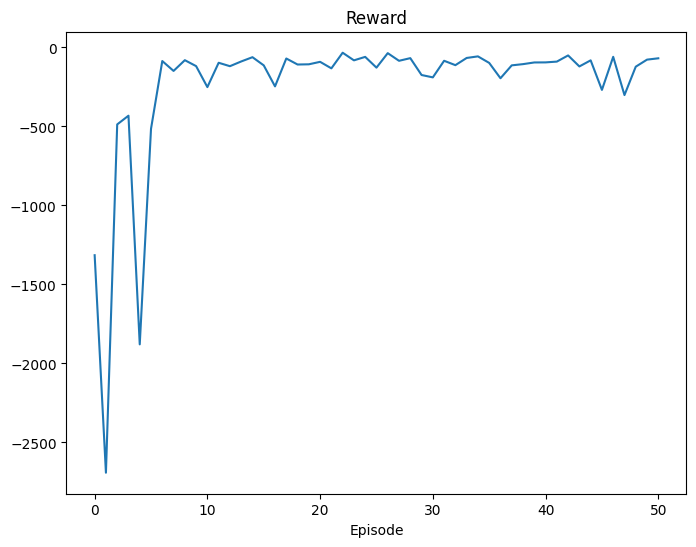

In [25]:
reward_list = []

for path in reward_sorted_file_paths:
    df = pd.read_csv(path, index_col=0)
    reward_list.append(df.iloc[-1, :].mean())

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(reward_list)
ax.set_title('Reward')
ax.set_xlabel('Episode')
# ax.set_ylabel('Reward')
plt.show()
fig.savefig('output/insight/reward.png', dpi=300)

# Cost

In [26]:
cost_file_paths = glob.glob('output/*/electricity_cost.csv')
cost_sorted_file_paths = sorted(cost_file_paths, key=numerical_sort)

print(cost_sorted_file_paths)

['output\\episode0\\electricity_cost.csv', 'output\\episode1\\electricity_cost.csv', 'output\\episode2\\electricity_cost.csv', 'output\\episode3\\electricity_cost.csv', 'output\\episode4\\electricity_cost.csv', 'output\\episode5\\electricity_cost.csv', 'output\\episode6\\electricity_cost.csv', 'output\\episode7\\electricity_cost.csv', 'output\\episode8\\electricity_cost.csv', 'output\\episode9\\electricity_cost.csv', 'output\\episode10\\electricity_cost.csv', 'output\\episode11\\electricity_cost.csv', 'output\\episode12\\electricity_cost.csv', 'output\\episode13\\electricity_cost.csv', 'output\\episode14\\electricity_cost.csv', 'output\\episode15\\electricity_cost.csv', 'output\\episode16\\electricity_cost.csv', 'output\\episode17\\electricity_cost.csv', 'output\\episode18\\electricity_cost.csv', 'output\\episode19\\electricity_cost.csv', 'output\\episode20\\electricity_cost.csv', 'output\\episode21\\electricity_cost.csv', 'output\\episode22\\electricity_cost.csv', 'output\\episode23\\

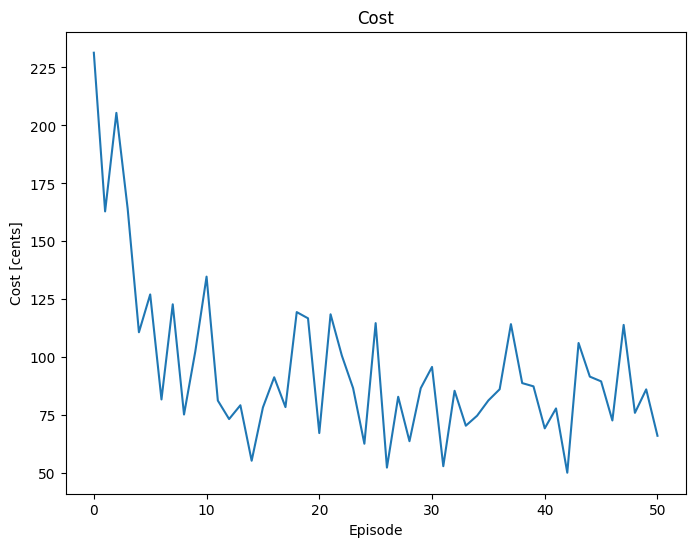

In [27]:
cost_list = []

for path in cost_sorted_file_paths:
    df = pd.read_csv(path, index_col=0)
    cost_list.append(df.iloc[-1, :].mean())

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(cost_list)
ax.set_title('Cost')
ax.set_xlabel('Episode')
ax.set_ylabel('Cost [cents]')
plt.show()
fig.savefig('output/insight/cost.png', dpi=300)

# Grid import

In [28]:
grid_import_file_paths = glob.glob('output/*/grid_import_record.csv')
grid_import_sorted_file_paths = sorted(grid_import_file_paths, key=numerical_sort)

print(grid_import_sorted_file_paths)

['output\\episode0\\grid_import_record.csv', 'output\\episode1\\grid_import_record.csv', 'output\\episode2\\grid_import_record.csv', 'output\\episode3\\grid_import_record.csv', 'output\\episode4\\grid_import_record.csv', 'output\\episode5\\grid_import_record.csv', 'output\\episode6\\grid_import_record.csv', 'output\\episode7\\grid_import_record.csv', 'output\\episode8\\grid_import_record.csv', 'output\\episode9\\grid_import_record.csv', 'output\\episode10\\grid_import_record.csv', 'output\\episode11\\grid_import_record.csv', 'output\\episode12\\grid_import_record.csv', 'output\\episode13\\grid_import_record.csv', 'output\\episode14\\grid_import_record.csv', 'output\\episode15\\grid_import_record.csv', 'output\\episode16\\grid_import_record.csv', 'output\\episode17\\grid_import_record.csv', 'output\\episode18\\grid_import_record.csv', 'output\\episode19\\grid_import_record.csv', 'output\\episode20\\grid_import_record.csv', 'output\\episode21\\grid_import_record.csv', 'output\\episode22\

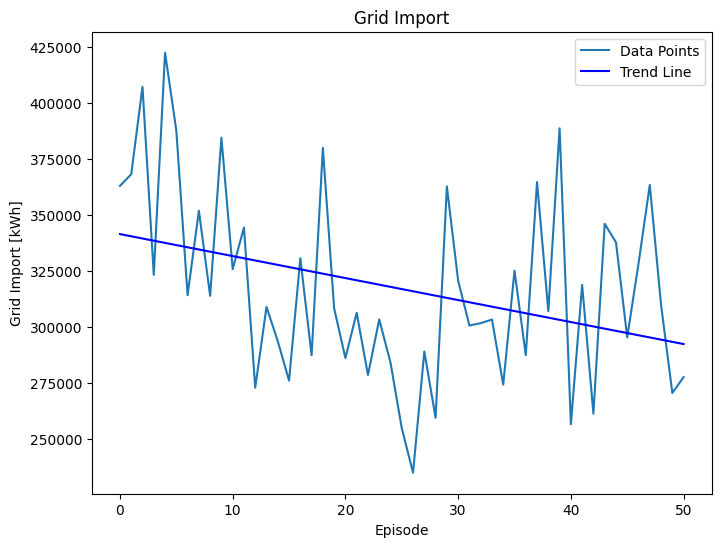

In [35]:
grid_import_sum_list = []

for path in grid_import_sorted_file_paths:
    df = pd.read_csv(path, index_col=0)
    grid_import_sum_list.append(df.sum(axis=0).values[0])

# データポイントの作成
x = np.arange(len(grid_import_sum_list))
y = np.array(grid_import_sum_list)

# 線形回帰の計算
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

# グラフの作成
fig, ax = plt.subplots(figsize=(8, 6))

# データポイントのプロット
ax.plot(x, y, label='Data Points')

# トレンドラインのプロット
ax.plot(x, trendline, label='Trend Line', color='blue')

# グラフの装飾
ax.set_xlabel('Episode')
ax.set_ylabel('Grid Import [kWh]')
ax.set_title('Grid Import')
ax.legend()

# グラフの表示
plt.show()

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(grid_import_sum_list)
# ax.set_title('Grid Import')
# ax.set_xlabel('Episode')
# ax.set_ylabel('Grid Import [kWh]')
# plt.show()
fig.savefig('output/insight/grid_import.png', dpi=300)